In [ ]:
import mikeio
import pandas as pd
import numpy as np


from pyproj import Transformer

import matplotlib.pyplot as plt
import contextily as ctx
import plotly.graph_objects as go

# maybe visualize with some mapbox layer (dfsu rendered as geotiff?) as it probably will be later https://plotly.com/python/mapbox-density-heatmaps/

**read xml**

In [2]:
xmlname = r'C:\Source\particle_tools\OpCIS2019_offline\OpCIS2019_offline_PT_decoupled_t_kenter_pt_passive_xml.mfm - Result Files\Person_track.xml'
df = pd.read_xml(xmlname, encoding="US-ASCII", xpath="//Particle")

#expand particle attributes in DataFrame
df[['x', 'y', 'z', 'age', 'hdir', 'hspeed', 'vspeed', 'mass']] = df['Particle'].str.split(',', expand=True)
df.drop(columns='Particle', inplace=True)
s = df.select_dtypes(include='object').columns
df[s] = df[s].astype("float")

# for dynamic plotting: aggregate in intervals by just ceiling to 10 min. intervals, then revert back to minutes
df['minutes'] = df.age.apply(lambda x: np.ceil(x/600)*10)

df

,Nr,Particle
0,1,"559143.42, 5933004.6, -2.0679833, 360, 272.339..."
1,101,"559206.58, 5933023.8, -2.070086, 300, 272.591,..."
2,201,"559199.41, 5933043.5, -2.069864, 240, 273.4492..."
3,301,"559179.38, 5933003.5, -2.0696006, 180, 272.231..."
4,401,"559233.68, 5933022.9, -2.071397, 120, 272.4477..."
...,...,...
1559,901,"559753.48, 5932974.3, -1.2538123, 46620, 90.06..."
1560,201,"559985.72, 5933035.7, -1.2529499, 47040, 89.27..."
1561,1101,"559914.86, 5933029.4, -1.2532882, 46500, 89.50..."
1562,801,"559905.34, 5933027.4, -1.2533792, 46680, 89.60..."


add lat lon columns to DataFrame

In [4]:
transformer = Transformer.from_crs("epsg:25832", "epsg:4326")
xt, yt = transformer.transform(df['x'], df['y'])
df['lat'], df['lon'] = xt, yt
df

,Nr,x,y,z,age,hdir,hspeed,vspeed,mass,lat,lon
0,1,559143.42,5933004.6,-2.067983,360.0,272.339540,0.123424,0.0,4200.0,53.542609,9.892526
1,101,559206.58,5933023.8,-2.070086,300.0,272.591000,0.100904,0.0,4200.0,53.542775,9.893483
2,201,559199.41,5933043.5,-2.069864,240.0,273.449240,0.070693,0.0,4200.0,53.542952,9.893378
3,301,559179.38,5933003.5,-2.069601,180.0,272.231470,0.135693,0.0,4200.0,53.542595,9.893068
4,401,559233.68,5933022.9,-2.071397,120.0,272.447740,0.089183,0.0,4200.0,53.542763,9.893891
...,...,...,...,...,...,...,...,...,...,...,...
1559,901,559753.48,5932974.3,-1.253812,46620.0,90.068212,0.313864,0.0,4200.0,53.542268,9.901725
1560,201,559985.72,5933035.7,-1.252950,47040.0,89.275999,0.300361,0.0,4200.0,53.542793,9.905241
1561,1101,559914.86,5933029.4,-1.253288,46500.0,89.507743,0.294936,0.0,4200.0,53.542745,9.904171
1562,801,559905.34,5933027.4,-1.253379,46680.0,89.602544,0.292492,0.0,4200.0,53.542728,9.904027


**plot static results**

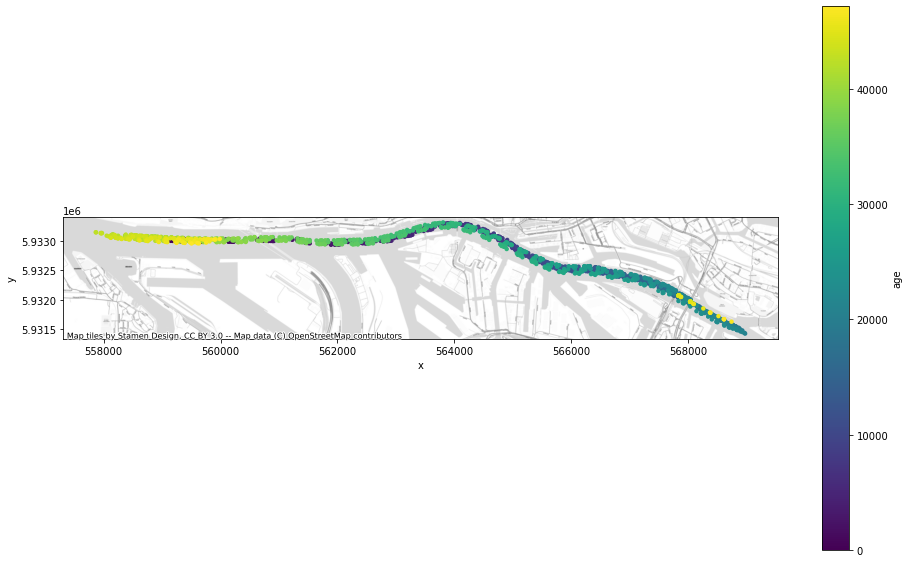

In [5]:
fig, ax = plt.subplots(1,1, figsize=(16,10))
df.plot.scatter('x','y', c='age', edgecolor='None', ax=ax)
ctx.add_basemap(ax=ax, crs='epsg:25832', source=ctx.providers.Stamen.TonerLite) #ctx.providers.OpenStreetMap.Mapnik

**plot dynamic results**

In [28]:
import plotly.express as px

fig = px.density_mapbox(df, lat='lat', lon='lon', radius=10,
                        center=dict(lat=df.lat.mean(), lon=df.lon.mean()), zoom=12,
                        mapbox_style="stamen-terrain", animation_frame='minutes')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})